# Various simulations related to the signature
## Notebook for using the signatory library

### Mechanism for Brownian Motion

In [1]:
pip install torch==1.7.1 --no-cache-dir --force-reinstall

     -------------------------------------- 184.0/184.0 MB 6.4 MB/s eta 0:00:00
     --------------------------------------- 15.1/15.1 MB 11.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\vjeko\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [2]:
import torch

In [3]:
from platform import python_version

print(python_version())

3.9.13


In [4]:
print(torch.__version__)

1.7.1+cpu


In [5]:
pip install ninja

Note: you may need to restart the kernel to use updated packages.


In [6]:
import ninja

In [7]:
pip install signatory==1.2.6.1.7.1 --no-cache-dir --force-reinstall

     ---------------------------------------- 62.8/62.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for signatory: filename=signatory-1.2.6.1.7.1-cp39-cp39-win_amd64.whl size=191298 sha256=3cd530ef4403ec1a8bd099c992933f4fcbe4425deb7b049286e1e08c411f6430
  Stored in directory: C:\Users\vjeko\AppData\Local\Temp\pip-ephem-wheel-cache-i190k2i5\wheels\7f\e8\24\06bc3e16e581c4f0059a12ac02bcb9bd11abe1a6afadcc9122
Successfully built signatory
  Attempting uninstall: signatory
    Found existing installation: signatory 1.2.6.1.7.1
    Uninstalling signatory-1.2.6.1.7.1:
      Successfully uninstalled signatory-1.2.6.1.7.1
Note: you may need to restart the kernel to use updated packages.


In [8]:
import signatory

In [9]:
import numpy as np

### Class for Brownians

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [55]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w

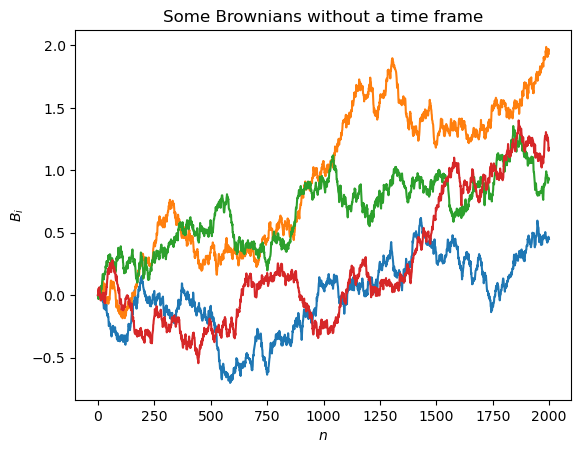

In [56]:
b = Brownian()
for i in range(4):
    plt.plot(1*b.gen_normal(2000))

plt.title("Some Brownians without a time frame")
plt.xlabel("$n$")
plt.ylabel("$B_i$")
plt.show()

### Time&step structure

In [57]:
N = 101
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

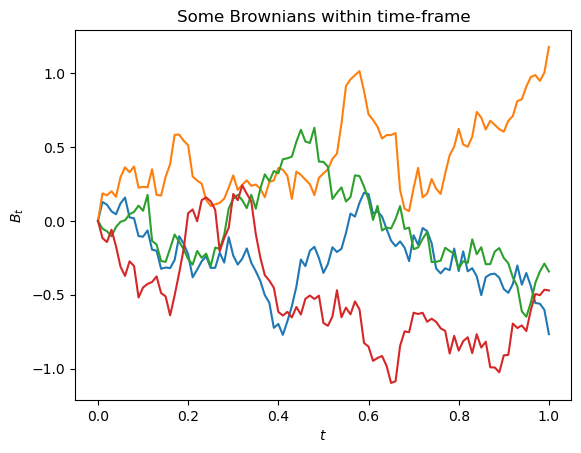

In [58]:
for i in range(4):
    plt.plot(x_axis, b.gen_normal(101))
plt.title("Some Brownians within time-frame")
plt.xlabel("$t$")
plt.ylabel("$B_t$")
plt.show()

## 1-Dimensional Stochastic Double Well

### Constructing the process

In [59]:
b = Brownian()

theta, mu, sigma, y0 = 1, 2, 1, 1
Y = np.zeros(N)
Y[0] = y0
brow = b.gen_normal(N+1)
db =  np.diff(brow)

In [60]:
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]

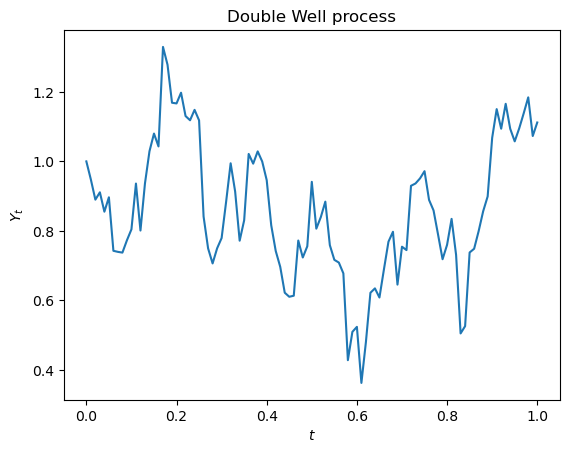

In [61]:
plt.plot(x_axis, Y)
plt.title("Double Well process")
plt.xlabel("$t$")
plt.ylabel("$Y_t$")
plt.show()

### Calculating the true signature of the process

In [62]:
k = 10
Y_tens = torch.Tensor(Y)
Y_tens = torch.reshape(Y_tens, (1, N, 1))
Y_tens.shape
Z = np.zeros((N, k))

In [63]:
sig = signatory.signature(Y_tens, k)
aux = np.zeros((1,k))
aux[0,0] = 0
Z[0] = aux

In [64]:
Y_path_class = signatory.Path(Y_tens, k)


In [65]:
for i in range(1,N):
    Z[i] = Y_path_class.signature(0, i+1).numpy()



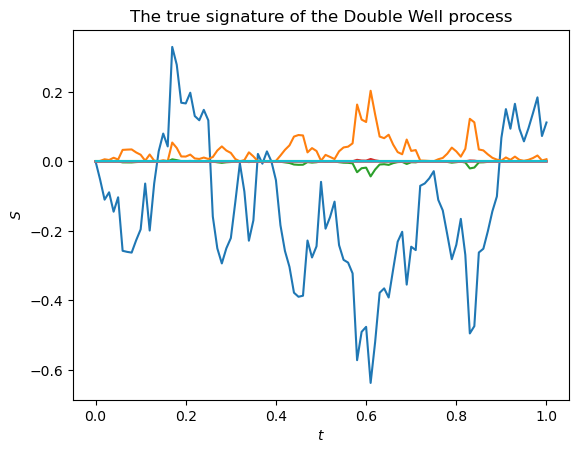

In [66]:
for i in range(10):
    plt.plot(x_axis, Z[:,i])

plt.title("The true signature of the Double Well process")
plt.xlabel("$t$")
plt.ylabel("$S$")
plt.show()